In [20]:
from gym_swimmer import SwimmerEnv
import numpy as np
env = SwimmerEnv()

In [29]:
env.reset()

array([ 0.01715814,  0.04641313, -0.01870446, -0.03867301,  0.0591969 ,
        0.0840994 , -0.00092361, -0.03469689,  0.03626867,  0.03155975])

In [62]:
env.step([-1, -1])

(array([-1.05617284,  0.65670722,  1.69379052, -1.67425913, -1.72849654,
        -1.53417391, -0.31228699,  1.55259978, -1.49147752, -1.58556527]),
 -0.21460284784269254,
 False,
 {'x': array([-1.05617284,  0.65670722,  1.69379052, -1.67425913, -1.72849654,
         -1.53417391, -0.31228699,  1.55259978, -1.49147752, -1.58556527]),
  'action': [-1, -1],
  'goal': array([4, 0]),
  'next_goal': False,
  'next_free': True,
  'next_danger': False})

In [65]:
env.sim.data.body_xpos

array([[ 0.        ,  0.        ,  0.        ],
       [ 3.        ,  1.        ,  0.        ],
       [ 1.5       , -1.        ,  0.        ],
       [ 0.62785426, -0.83196082,  0.        ],
       [ 0.56651181, -0.33573798,  0.        ],
       [-0.43329746, -0.35526808,  0.        ]])

In [64]:
env.sim.data.xanchor

array([[ 1.5       ,  0.        ,  0.        ],
       [ 0.44382692,  0.        ,  0.        ],
       [ 0.44382692,  0.65670769,  0.        ],
       [ 0.56651181, -0.33573798,  0.        ],
       [-0.43329746, -0.35526808,  0.        ]])

In [5]:
from PIL import Image
ims = [Image.fromarray(np.flip(a_frame, axis=0)) for a_frame in imgs]
ims[0].save("try.gif", save_all=True, append_images=ims[1:], loop=0, duration=20)

NameError: name 'imgs' is not defined

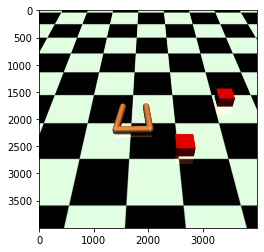

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.imshow(env.render('rgb_array', 4000, 4000))
plt.show()

In [2]:
env = SwimmerEnv()

In [60]:
env.sim.model.geom_id2name(2)

'track'

In [61]:
env.sim.data.qpos

array([-0.00011752, -0.00885351,  0.00649255, -0.02406456,  0.04311483])

In [5]:
env._get_obs()

10

In [64]:
env.action_space.shape

(2,)

In [33]:
imgs = [env.sim.render(600, 600)]


In [33]:
env = SwimmerEnv()
imgs = [env.sim.render(100, 100)]
for _ in range(1000):
    env.step(np.random.uniform(-1, 1, size=(2,)))
    imgs.append(env.sim.render(100, 100))
    if env.sim.data.ncon != 0:
        print('yes')       
    
# for _ in range(1000):
#     env.step(np.array([0.1, -0.1]))
#     imgs.append(env.sim.render(100, 100))
#     if env.sim.data.ncon != 0:
#         print('yes')    

yes
yes
yes
yes
yes
yes


In [57]:
import mujoco_py
sim = env.sim
print('number of contacts', sim.data.ncon)
for i in range(sim.data.ncon):
    # Note that the contact array has more than `ncon` entries,
    # so be careful to only read the valid entries.
    contact = sim.data.contact[i]
    print('contact', i)
    print('dist', contact.dist)
    print('geom1', contact.geom1, sim.model.geom_id2name(contact.geom1))
    print('geom2', contact.geom2, sim.model.geom_id2name(contact.geom2))
    # There's more stuff in the data structure
    # See the mujoco documentation for more info!
    geom2_body = sim.model.geom_bodyid[sim.data.contact[i].geom2]
    print(' Contact force on geom2 body', sim.data.cfrc_ext[geom2_body])
    print('norm', np.sqrt(np.sum(np.square(sim.data.cfrc_ext[geom2_body]))))
    # Use internal functions to read out mj_contactForce
    c_array = np.zeros(6, dtype=np.float64)
    print('c_array', c_array)
    mujoco_py.functions.mj_contactForce(sim.model, sim.data, i, c_array)
    print('c_array', c_array)

print('done')

number of contacts 7
contact 0
dist -9.71445146547012e-17
geom1 0 floor
geom2 2 track
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [25411.06831463   899.15295372 24511.9153609      0.
     0.             0.        ]
contact 1
dist -8.326672684688674e-17
geom1 0 floor
geom2 3 mid
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [24442.90383963    92.87517774 24350.02866189     0.
     0.             0.        ]
contact 2
dist -8.326672684688674e-17
geom1 0 floor
geom2 4 back
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [ 257.98410277 -210.61229105   47.37181172    0.            0.
    0.        ]
contact 3
dist -0.05044105749593966
geom1 2 track
geom2 1 box
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [0. 0. 0. 0. 0. 0.]
contact 4
dist -0.039840715649703734
geom1 2 track
geom2 1 box
 Contact force 

In [53]:
sim.data.sensordata

True

In [12]:
import os
import mujoco_py
import numpy as np

PATH_TO_HUMANOID_XML = os.path.expanduser('~/.mujoco/mujoco210/model/humanoid.xml')

# Load the model and make a simulator
model = mujoco_py.load_model_from_path(PATH_TO_HUMANOID_XML)
sim = mujoco_py.MjSim(model)
imgs = [sim.render(600, 600)]

# Simulate 1000 steps so humanoid has fallen on the ground
for _ in range(10000):
    sim.step()
    if _ % 100 == 0:
        imgs.append(sim.render(600, 600))

print('number of contacts', sim.data.ncon)
for i in range(sim.data.ncon):
    # Note that the contact array has more than `ncon` entries,
    # so be careful to only read the valid entries.
    contact = sim.data.contact[i]
    print('contact', i)
    print('dist', contact.dist)
    print('geom1', contact.geom1, sim.model.geom_id2name(contact.geom1))
    print('geom2', contact.geom2, sim.model.geom_id2name(contact.geom2))
    # There's more stuff in the data structure
    # See the mujoco documentation for more info!
    geom2_body = sim.model.geom_bodyid[sim.data.contact[i].geom2]
    print(' Contact force on geom2 body', sim.data.cfrc_ext[geom2_body])
    print('norm', np.sqrt(np.sum(np.square(sim.data.cfrc_ext[geom2_body]))))
    # Use internal functions to read out mj_contactForce
    c_array = np.zeros(6, dtype=np.float64)
    print('c_array', c_array)
    mujoco_py.functions.mj_contactForce(sim.model, sim.data, i, c_array)
    print('c_array', c_array)

print('done')

number of contacts 14
contact 0
dist -0.0001238218347592579
geom1 0 floor
geom2 2 head
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [ 4.46181433e+01 -5.54631896e-11  1.81965367e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
contact 1
dist -9.631626892431244e-05
geom1 0 floor
geom2 3 uwaist
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [ 3.44512013e+01 -4.53397320e-11 -1.80731853e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
contact 2
dist -9.631626892203649e-05
geom1 0 floor
geom2 3 uwaist
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [ 3.44512013e+01 -4.53397320e-11 -1.80731853e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
contact 3
dist -0.00039155532839034446
geom1 0 floor
geom2 8 right_foot_cap1
 Contact force on geom2 body [0. 0. 0. 0. 0. 0.]
norm 0.0
c_array [0. 0. 0. 0. 0. 0.]
c_array [2.30846809e+01 7.79996660e-0

NameError: name 'sim' is not defined